### **Image Classification with Keras in Tensorflow**

In this notebook, I create a simple deep neural network model that predicts the digits 0-9 from hand-written images with a very high degree of accuracy. 



In [32]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.4.0


**I will be using the MNIST dataset, which has 60,000 images in the training set and 10,000 images in the test set.**

In [33]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

**This is the tensor of the first element in the training set.**

In [34]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

**Here are more details about the shape of the sets, and I plot one image as an example.**

In [35]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


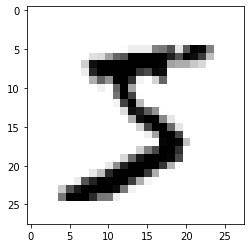

In [36]:
plt.imshow(x_train[0], cmap = 'binary')
plt.show()

In [37]:
y_train[0]

5

In [38]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

**Since the output labels only have 10 values, I apply one-hot encoding to convert the labels to classes 0 or 1.**

In [39]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

**I check the shape of the encoded labels.**

In [40]:
print('y_train shape: ', y_train_encoded.shape)
print('y_test shape: ', y_test_encoded.shape)

y_train shape:  (60000, 10)
y_test shape:  (10000, 10)


In [41]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

**The outputs will now be 10-dimensional vectors, and I want to input 784 dimensional vectors (28 rows * 28 columns) to the NN.**

In [42]:
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

print('x_train_reshaped shape: ', x_train_reshaped.shape)
print('x_test_reshaped shape: ', x_test_reshaped.shape)

x_train_reshaped shape:  (60000, 784)
x_test_reshaped shape:  (10000, 784)


In [43]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


**I also need to normalize the pixel values to enable the NN to learn the weights and biases. To achieve this, I calculate the mean and standard deviation for each example.**

In [44]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

print('Mean: ', x_mean)
print('STD: ', x_std)

Mean:  33.318421449829934
STD:  78.56748998339798


In [45]:
epsilon = 1e-10
x_train_norm = (x_train_reshaped - x_mean)/(x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean)/(x_std + epsilon)

print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

**For the model, I use a Sequential class with Dense layers where the activation function will be ELU and Softmax.**

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation = 'elu', input_shape = (784,)),
    Dense(128, activation = 'elu'),
    Dense(128, activation = 'elu'),
    Dense(10, activation = 'softmax')
])

**I configure the model for training.**

In [65]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_23 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_24 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


**It's time to train the model in 4 epochs.**

In [68]:
model.fit(
    x_train_norm,
    y_train_encoded,
    epochs =4
)

Epoch 1/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0452 - accuracy: 0.9861
Epoch 2/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0398 - accuracy: 0.9866
Epoch 3/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0345 - accuracy: 0.9885
Epoch 4/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0330 - accuracy: 0.9900


**I evaluate the performance of the test set to ensure that it did not simply memorize the train set.**

In [69]:
accuracy = model.evaluate(x_test_norm, y_test_encoded)

print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 0s 1ms/step - loss: 0.1023 - accuracy: 0.9769
test set accuracy:  [0.10225788503885269, 0.9768999814987183, 0.10225788503885269, 0.9768999814987183, 0.10225788503885269, 0.9768999814987183, 0.10225788503885269, 0.9768999814987183, 0.10225788503885269, 0.9768999814987183, 0.10225788503885269, 0.9768999814987183, 0.10225788503885269, 0.9768999814987183, 0.10225788503885269, 0.9768999814987183, 0.10225788503885269, 0.9768999814987183, 0.10225788503885269, 0.9768999814987183, 0.10225788503885269, 0.9768999814987183, 0.10225788503885269, 0.9768999814987183, 0.10225788503885269, 0.9768999814987183, 0.10225788503885269, 0.9768999814987183, 0.10225788503885269, 0.9768999814987183, 0.10225788503885269, 0.9768999814987183, 0.10225788503885269, 0.9768999814987183, 0.10225788503885269, 0.9768999814987183, 0.10225788503885269, 0.9768999814987183, 0.10225788503885269, 0.9768999814987183, 0.10225788503885269, 0.9768999814987183, 0.10225788503885269, 0.976899

**I can now use the model to predict the values of the test set and plot some of the images with their predicted and actual labels.**

In [70]:
prediction = model.predict(x_test_norm)

print('Shape of prediction: ', prediction.shape)

Shape of prediction:  (10000, 10)


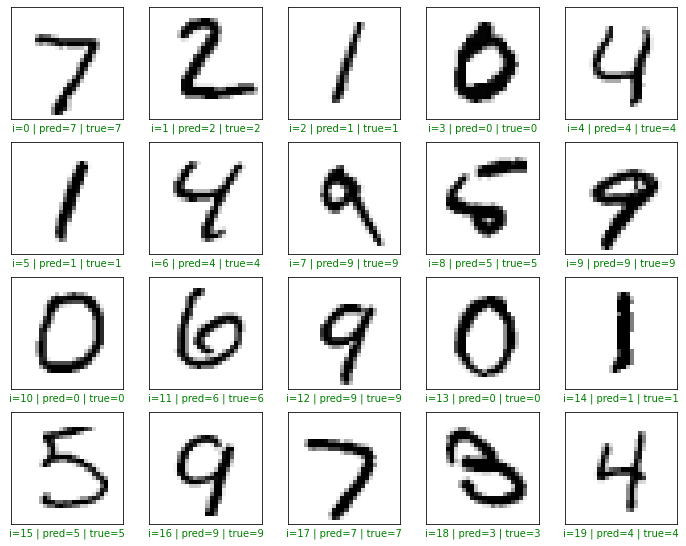

In [71]:
plt.figure(figsize = (12, 12))

start_index = 0

for i in range(20):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(prediction[start_index + i])
    actual = np.argmax(y_test_encoded[start_index + i])
    col = 'g'
    if pred != actual:
        col = 'r'
    plt.xlabel('i={} | pred={} | true={}'.format(start_index + i, pred, actual), color = col)
    plt.imshow(x_test[start_index + i], cmap='binary')
plt.show()

**I can also visualize the probability scores of the prediction.**

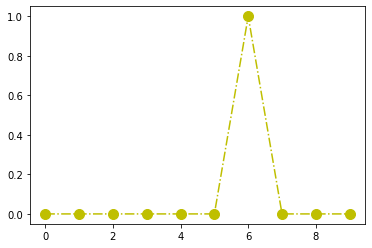

In [52]:
index = 11

plt.plot(prediction[index], 'o-.y', ms = 10)
plt.show()

**The model is working quite well–it predicts the majority of the digits correctly.**